<p><font size="6"><b> Visualizing spatial data with Python: GeoPandas</b></font></p>


> *DS Python for GIS and Geoscience*  
> *October, 2025*
>
> *© 2025, Joris Van den Bossche and Stijn Van Hoey. Licensed under [CC BY 4.0 Creative Commons](https://creativecommons.org/licenses/by/4.0/)*

---

In [1]:
import os
os.chdir(r"C:\Users\farcoppe\LOKAAL\Pyhton GIS Cursus\DS-python-geospatial\notebooks")

In [2]:
import pandas as pd
import geopandas

import matplotlib.pyplot as plt

In [3]:
countries = geopandas.read_file("data/ne_110m_admin_0_countries.zip")
countries = countries[countries['continent'] != "Antarctica"]
cities = geopandas.read_file("data/ne_110m_populated_places.zip")
rivers = geopandas.read_file("data/ne_50m_rivers_lake_centerlines.zip")

## GeoPandas visualization functionality

GeoPandas itself provides some visualization functionality, and together with matplotlib for further customization, you can already get decent results for visualizing vector data.

#### Basic plot

<Axes: >

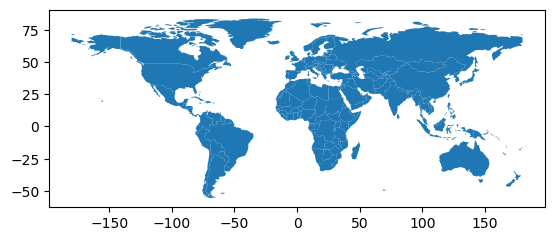

In [4]:
countries.plot()

<div class="alert alert-info" style="font-size:120%">

**NOTE**: <br>

Making a quick interactive plot is also available as the `.explore()` method on a GeoDataFrame or GeoSeries, using the Folium package. See the [visualization-04-interactive notebook](./visualization-04-interactive.ipynb) for more information on interactive plotting packages or check the [GeoPandas documentation](https://geopandas.org/en/stable/docs/user_guide/interactive_mapping.html) for more examples.

</div>

In [5]:
countries.explore()

#### Adjusting the figure size

<Axes: >

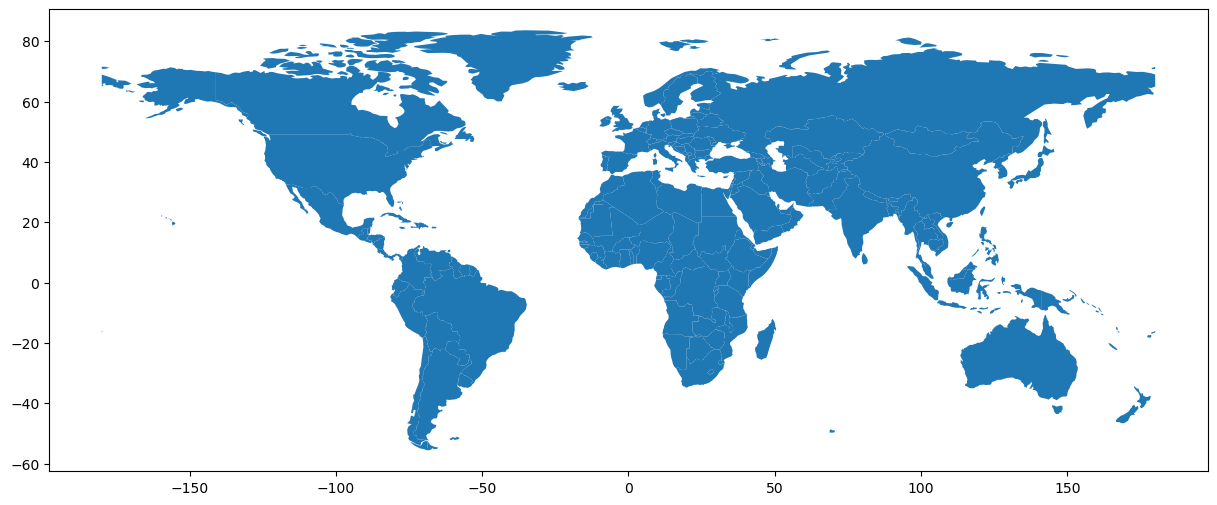

In [6]:
countries.plot(figsize=(15, 6))

#### Removing the box / x and y coordinate labels

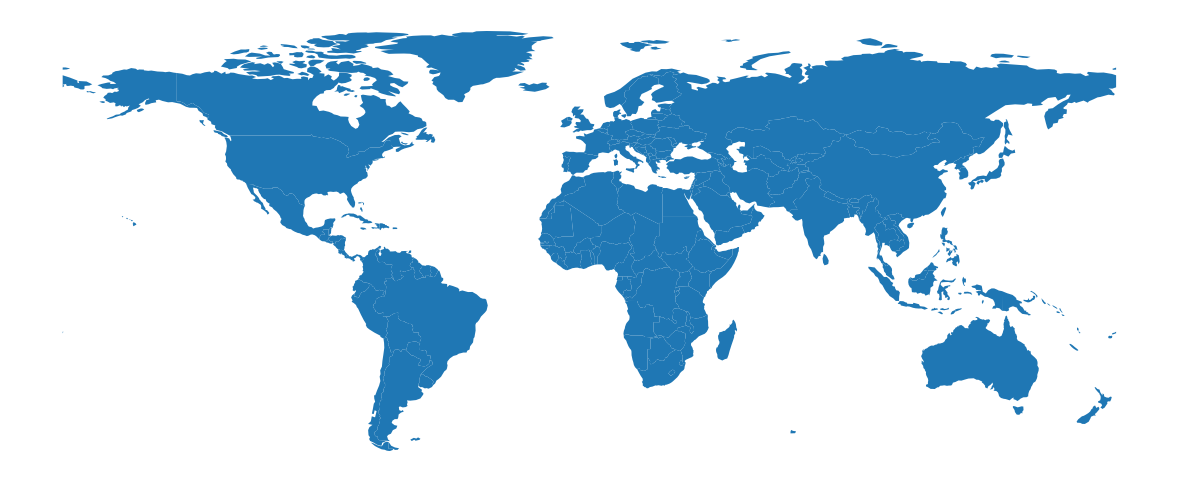

In [7]:
ax = countries.plot(figsize=(15, 6))
ax.set_axis_off()

#### Coloring based on column values

Let's first create a new column with the GDP per capita:

In [8]:
countries = countries[(countries['pop_est'] >0 ) & (countries['name'] != "Antarctica")]

In [9]:
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100

and now we can use this column to color the polygons:

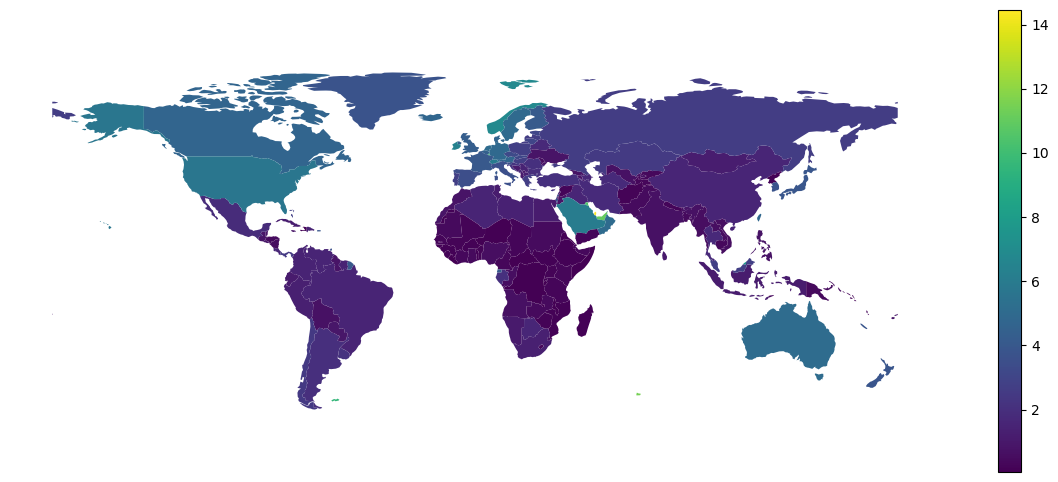

In [10]:
ax = countries.plot(figsize=(15, 6), column='gdp_per_cap', legend=True)
ax.set_axis_off()

Using a classification scheme to bin the values (using [`mapclassify`](https://pysal.org/mapclassify/)):

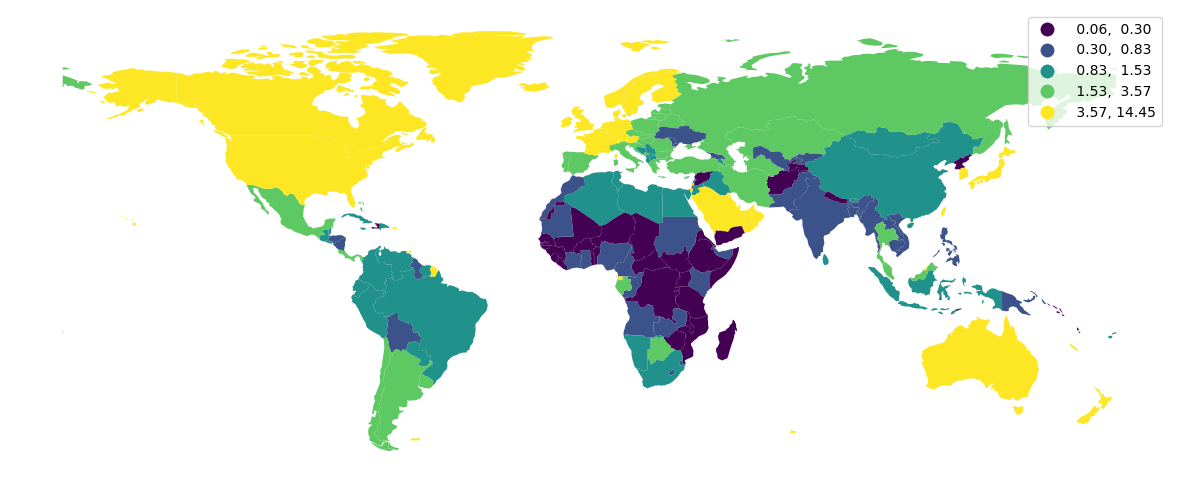

In [11]:
ax = countries.plot(figsize=(15, 6), column='gdp_per_cap', scheme='quantiles', legend=True)
ax.set_axis_off()

#### Combining different dataframes on a single plot

The `.plot` method returns a matplotlib Axes object, which can then be re-used to add additional layers to that plot with the `ax=` keyword:

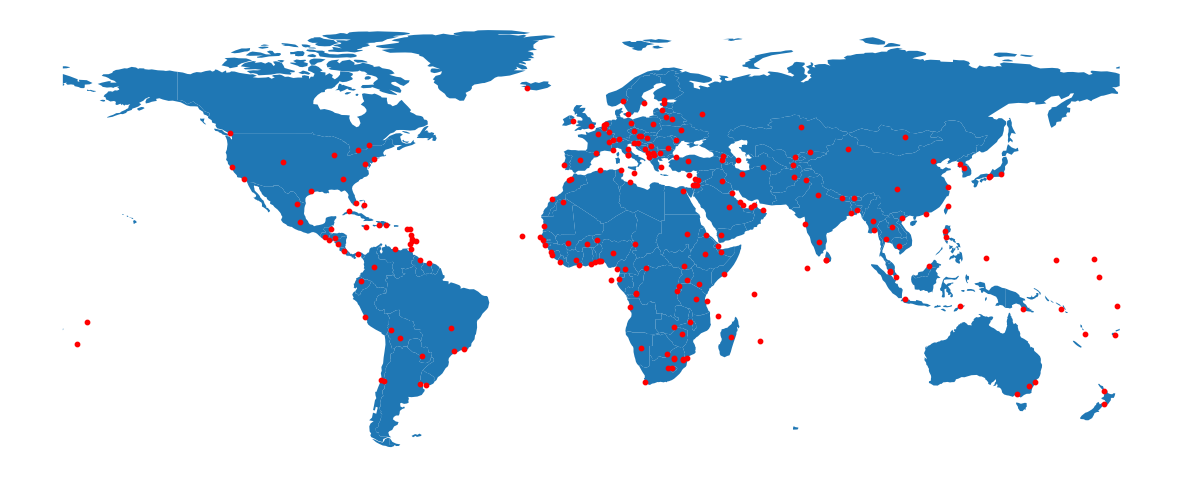

In [12]:
ax = countries.plot(figsize=(15, 6))
cities.plot(ax=ax, color='red', markersize=10)
ax.set_axis_off()

[(-20.0, 60.0), (-40.0, 40.0)]

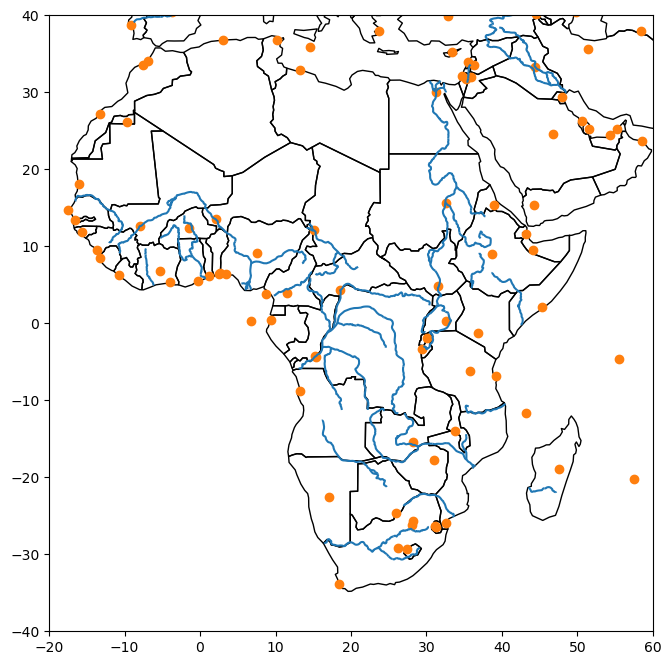

In [13]:
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(8, 8))
rivers.plot(ax=ax)
cities.plot(ax=ax, color='C1')
ax.set(xlim=(-20, 60), ylim=(-40, 40))

## Adding a background map with contextily

The contextily package allow to easily add a web-tile based background (basemap) to your GeoPandas plots.

Currently, the only requirement is that your data is already in the WebMercator projection (EPSG:3857).

In [14]:
# selecting the cities in Europe
cities_europe = cities[cities.within(countries[countries['continent'] == 'Europe'].union_all())]

In [15]:
# converting to WebMercator
cities_europe2 = cities_europe.to_crs(epsg=3857)

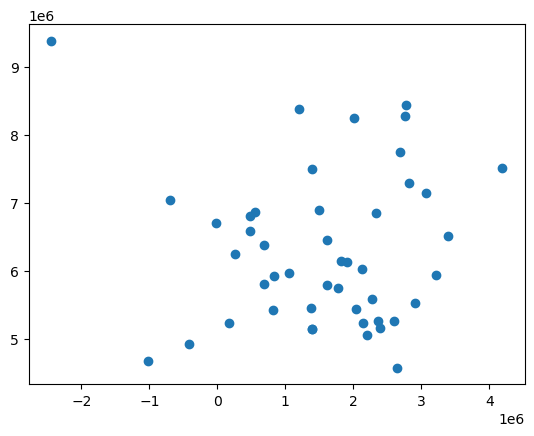

In [16]:
ax = cities_europe2.plot()

In [17]:
import contextily

In [18]:
# import matplotlib
# matplotlib.rcParams['figure.dpi'] = 300

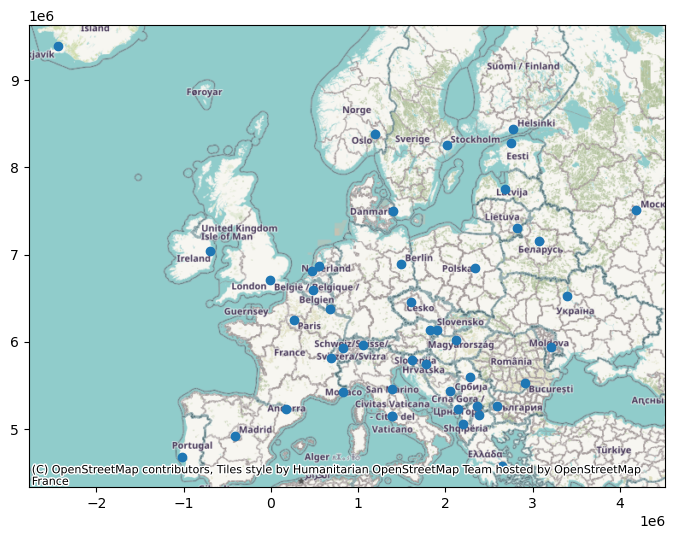

In [19]:
ax = cities_europe2.plot(figsize=(10, 6))
contextily.add_basemap(ax)

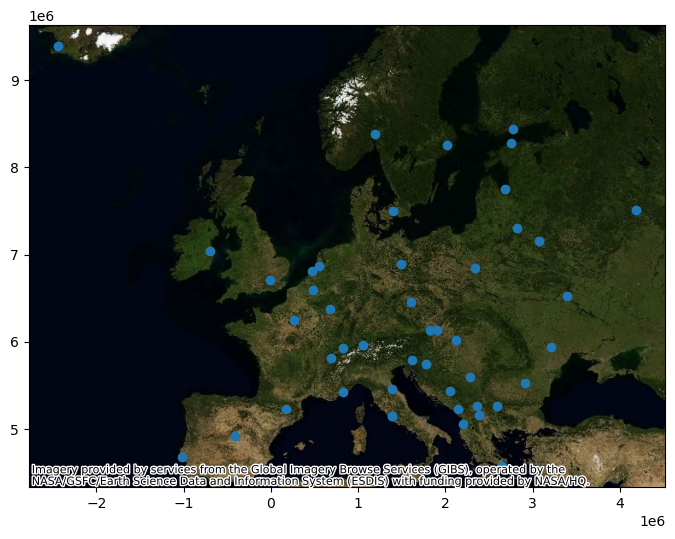

In [20]:
ax = cities_europe2.plot(figsize=(10, 6))
contextily.add_basemap(ax, source=contextily.providers.NASAGIBS.BlueMarble)

## Projection-aware maps with Cartopy

Cartopy is the base matplotlib cartographic library, and it is used by `geoplot` under the hood to provide projection-awareness (http://scitools.org.uk/cartopy/docs/latest/index.html).

The following example is taken from the docs: http://geopandas.readthedocs.io/en/latest/gallery/cartopy_convert.html#sphx-glr-gallery-cartopy-convert-py

In [21]:
from cartopy import crs as ccrs

In [22]:
# Define the CartoPy CRS object.
crs = ccrs.AlbersEqualArea()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
countries_ae = countries.to_crs(crs_proj4)

<Axes: >

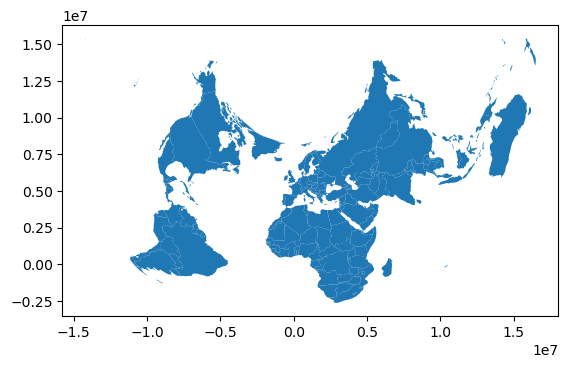

In [23]:
# Here's what the plot looks like in GeoPandas
countries_ae.plot()

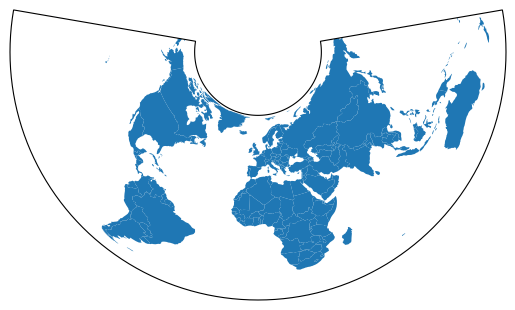

In [24]:
# Here's what the plot looks like when plotting with cartopy
fig, ax = plt.subplots(subplot_kw={'projection': crs})
ax.add_geometries(countries_ae['geometry'], crs=crs)

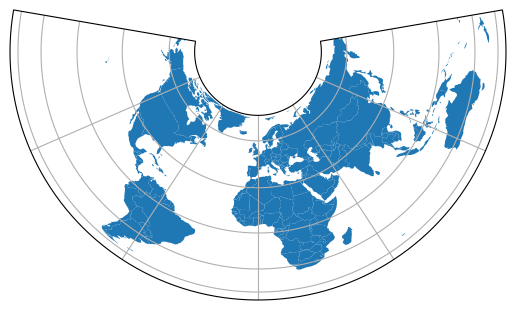

In [25]:
# Here's what the plot looks like when plotting with cartopy and geopandas combined
fig, ax = plt.subplots(subplot_kw={'projection': crs})
countries_ae['geometry'].plot(ax=ax)
ax.set_global()
ax.gridlines()

**For more on cartopy**, see the [visualization-03-cartopy.ipynb](visualization-03-cartopy.ipynb) notebook.